Geostatistical Inversion Benchmarking
=====================================

We provide a benchmark for a geostatistical inversion problem. Details of the benchmark can be found in the [paper]()

Here we give a brief intro of how to use the code to compare a replication results with the reference results

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pathlib
import yaml
import pandas
import plotly
from src.geostatbench import BayesInvBench
%matplotlib inline

## Download Data

To download the reference data, one can follow steps below:

- Set the **[config](./config/config.yaml)** file

- Run the **_download_and_run.sh_** file in the main folder

- One can also use the following code to download the data

In [4]:
# This is an alternative way to download data (if data download is already done, this will be skipped)
current_path = pathlib.Path.cwd()
config_file_path = current_path.joinpath("config/config.yaml")

with open(config_file_path, 'r') as config_file:
    config = yaml.safe_load(config_file)

data_path_r = config.get('datapath') # relative path
data_path = current_path.joinpath(data_path_r)
scenario_name = config.get('scenario_name')

if len(list(data_path.rglob('ref_'+scenario_name))) == 0:
    # creat BayesInvBench instance
    benchmark = BayesInvBench(config_file_path)
    benchmark.download_data_in_background()

## Prepare reference data and replication data

### Creat a `BayesInvBench` instance

In [5]:
# set config file path
current_path = pathlib.Path.cwd()
config_file_path = current_path.joinpath("config/config.yaml")

# creat BayesInvBench instance
benchmark = BayesInvBench(config_file_path)

2024-01-23 16:32:52 [INFO] src.geostatbench - API key:SEC-RET


### Prepare reference data

Choose the scenario you want to use. The following 5 scenarios are avalable. Details of the scenarios can be found in the [paper]()

| Scenario  | Std.dev of lnK synthetic truth | Std.dev of smeasurement errors | Well distribution | Flow state |
| --------- | -----------------------------  | -----------------------------  | ----------------- | ---------- |
|  S0       |  2      |  0.05       |  Random   |  Steady      |
|  S1       |  2      |  0.05       |  Regular  |  Steady      |
|  S2       |  1      |  0.05       |  Random   |  Steady      |
|  S3       |  2      |  0.1        |  Random   |  Steady      |
|  S4       |  2      |  0.05       |  Random   |  Transient   |

Two options to choose the scenario:

- In default, scenario name is already set in the **[config](./config/config.yaml)** file

- Otherwise, one can call `set_scenario_name` method to reset the scenario name
    > `benchmark.set_scenario_name('S4')`


Then, one can load the reference data by calling `prepare_reference_data` method

In [6]:
# prepare reference data
benchmark.prepare_reference_data()

2024-01-23 16:32:52 [INFO] src.geostatbench - f:\ls3_geo_stat_bench\data\reference\pCN-PT MCMC_xu_2020\ref_S4
2024-01-23 16:32:52 [INFO] src.geostatbench - f:\ls3_geo_stat_bench\data\reference\pCN-PT MCMC_xu_2020\ref_S4
2024-01-23 16:32:52 [INFO] src.geostatbench - S4b_reference_observations.out
2024-01-23 16:32:52 [INFO] src.geostatbench - S4_posterior_lnK_chain1_01.h5
2024-01-23 16:32:52 [INFO] src.geostatbench - S4_posterior_lnK_chain1_02.h5
2024-01-23 16:32:52 [INFO] src.geostatbench - S4_posterior_lnK_chain1_03.h5
2024-01-23 16:32:52 [INFO] src.geostatbench - S4_posterior_lnK_chain2_01.h5
2024-01-23 16:32:52 [INFO] src.geostatbench - S4_posterior_lnK_chain2_02.h5
2024-01-23 16:32:52 [INFO] src.geostatbench - S4_posterior_lnK_chain2_03.h5
2024-01-23 16:32:52 [INFO] src.geostatbench - Found 6 files: ['f:\\ls3_geo_stat_bench\\data\\reference\\pCN-PT MCMC_xu_2020\\ref_S4\\S4_posterior_lnK_chain1_01.h5', 'f:\\ls3_geo_stat_bench\\data\\reference\\pCN-PT MCMC_xu_2020\\ref_S4\\S4_posterio

### Prepare replication data

Two options:

- Option 1: 
    set the `replication_data` attribute if you are using your own data

    > `benchmark.replication_data = replication_data`  
    
    > `replication_data` should have shape `Nx100x100`, `N` is the number of samples

- Option 2:
    Rewrite the `load_replication_data` method to load the replication data you need, then call

    > `benchmark.load_replication_data()`


Here, we load the predefined EnKF data

In [7]:
# benchmark.replication_name = "rep_S4b_EnKF"

In [8]:
benchmark.load_replication_data()

2024-01-23 16:32:52 [INFO] src.geostatbench - F:\ls3_geo_stat_bench\data\replication\EnKF_xu_2020\rep_S4b_EnKF
2024-01-23 16:32:52 [INFO] src.geostatbench - F:\ls3_geo_stat_bench\data\replication\EnKF_xu_2020\rep_S4b_EnKF
F:/ls3_geo_stat_bench/data/replication/EnKF_xu_2020/rep_S4b_EnKF/*.out
2024-01-23 16:32:52 [INFO] src.geostatbench - Found 1 files: ['F:/ls3_geo_stat_bench/data/replication/EnKF_xu_2020/rep_S4b_EnKF\\S4b_EnKF.out']
2024-01-23 16:32:55 [INFO] src.geostatbench - Load replication file. Assumed there is only one file.


## Perform comparison

Call the `make_comparison_plot` method, which will return a figure ([Matplotlib figure](https://matplotlib.org/stable/api/figure_api.html)) and a table ([Pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html))

The figure and table are also saved in the *figurepath* and *tablepath* from the [config](./config/config.yaml) file

2024-01-23 16:40:25 [INFO] src.geostatbench - Wrote metrics into bench_df
[0.397 0.385 0.398 0.396 0.341 0.379]
2024-01-23 16:40:27 [WARNING] matplotlib.backends.backend_ps - The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


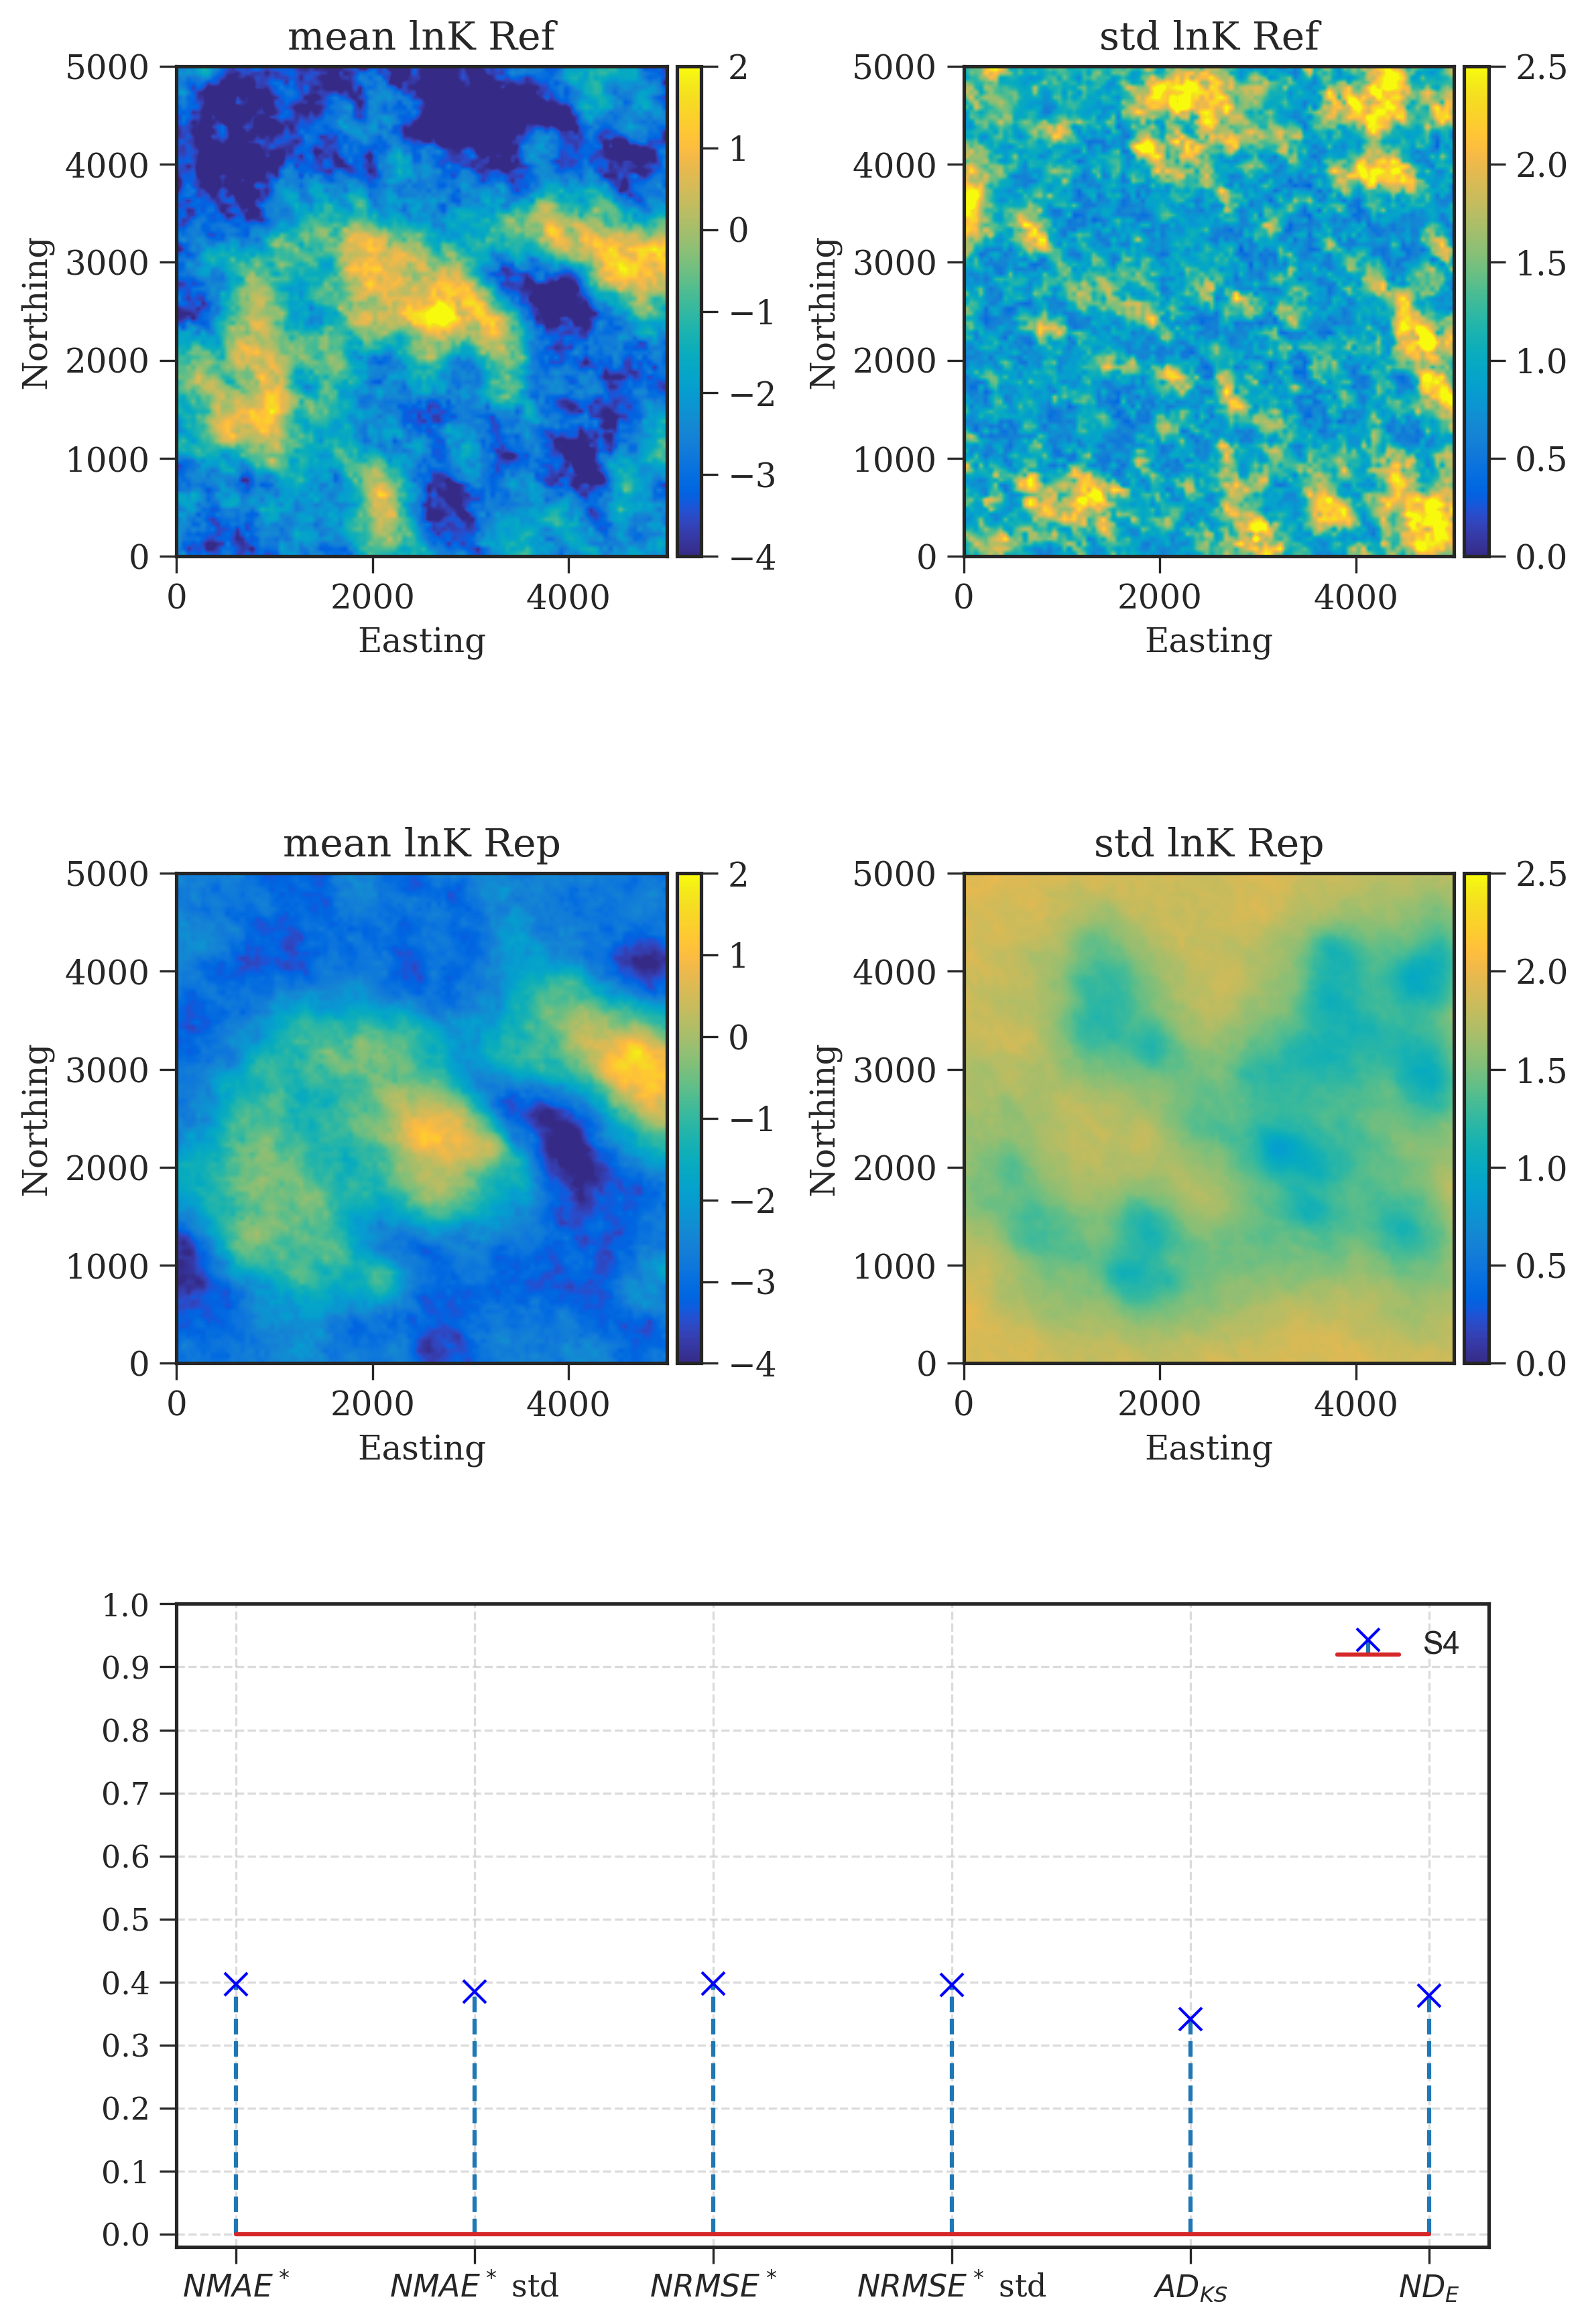

In [23]:
fig,table = benchmark.make_comparison_plot()

One can also show the *figure* and *table* (if thery are not shown)

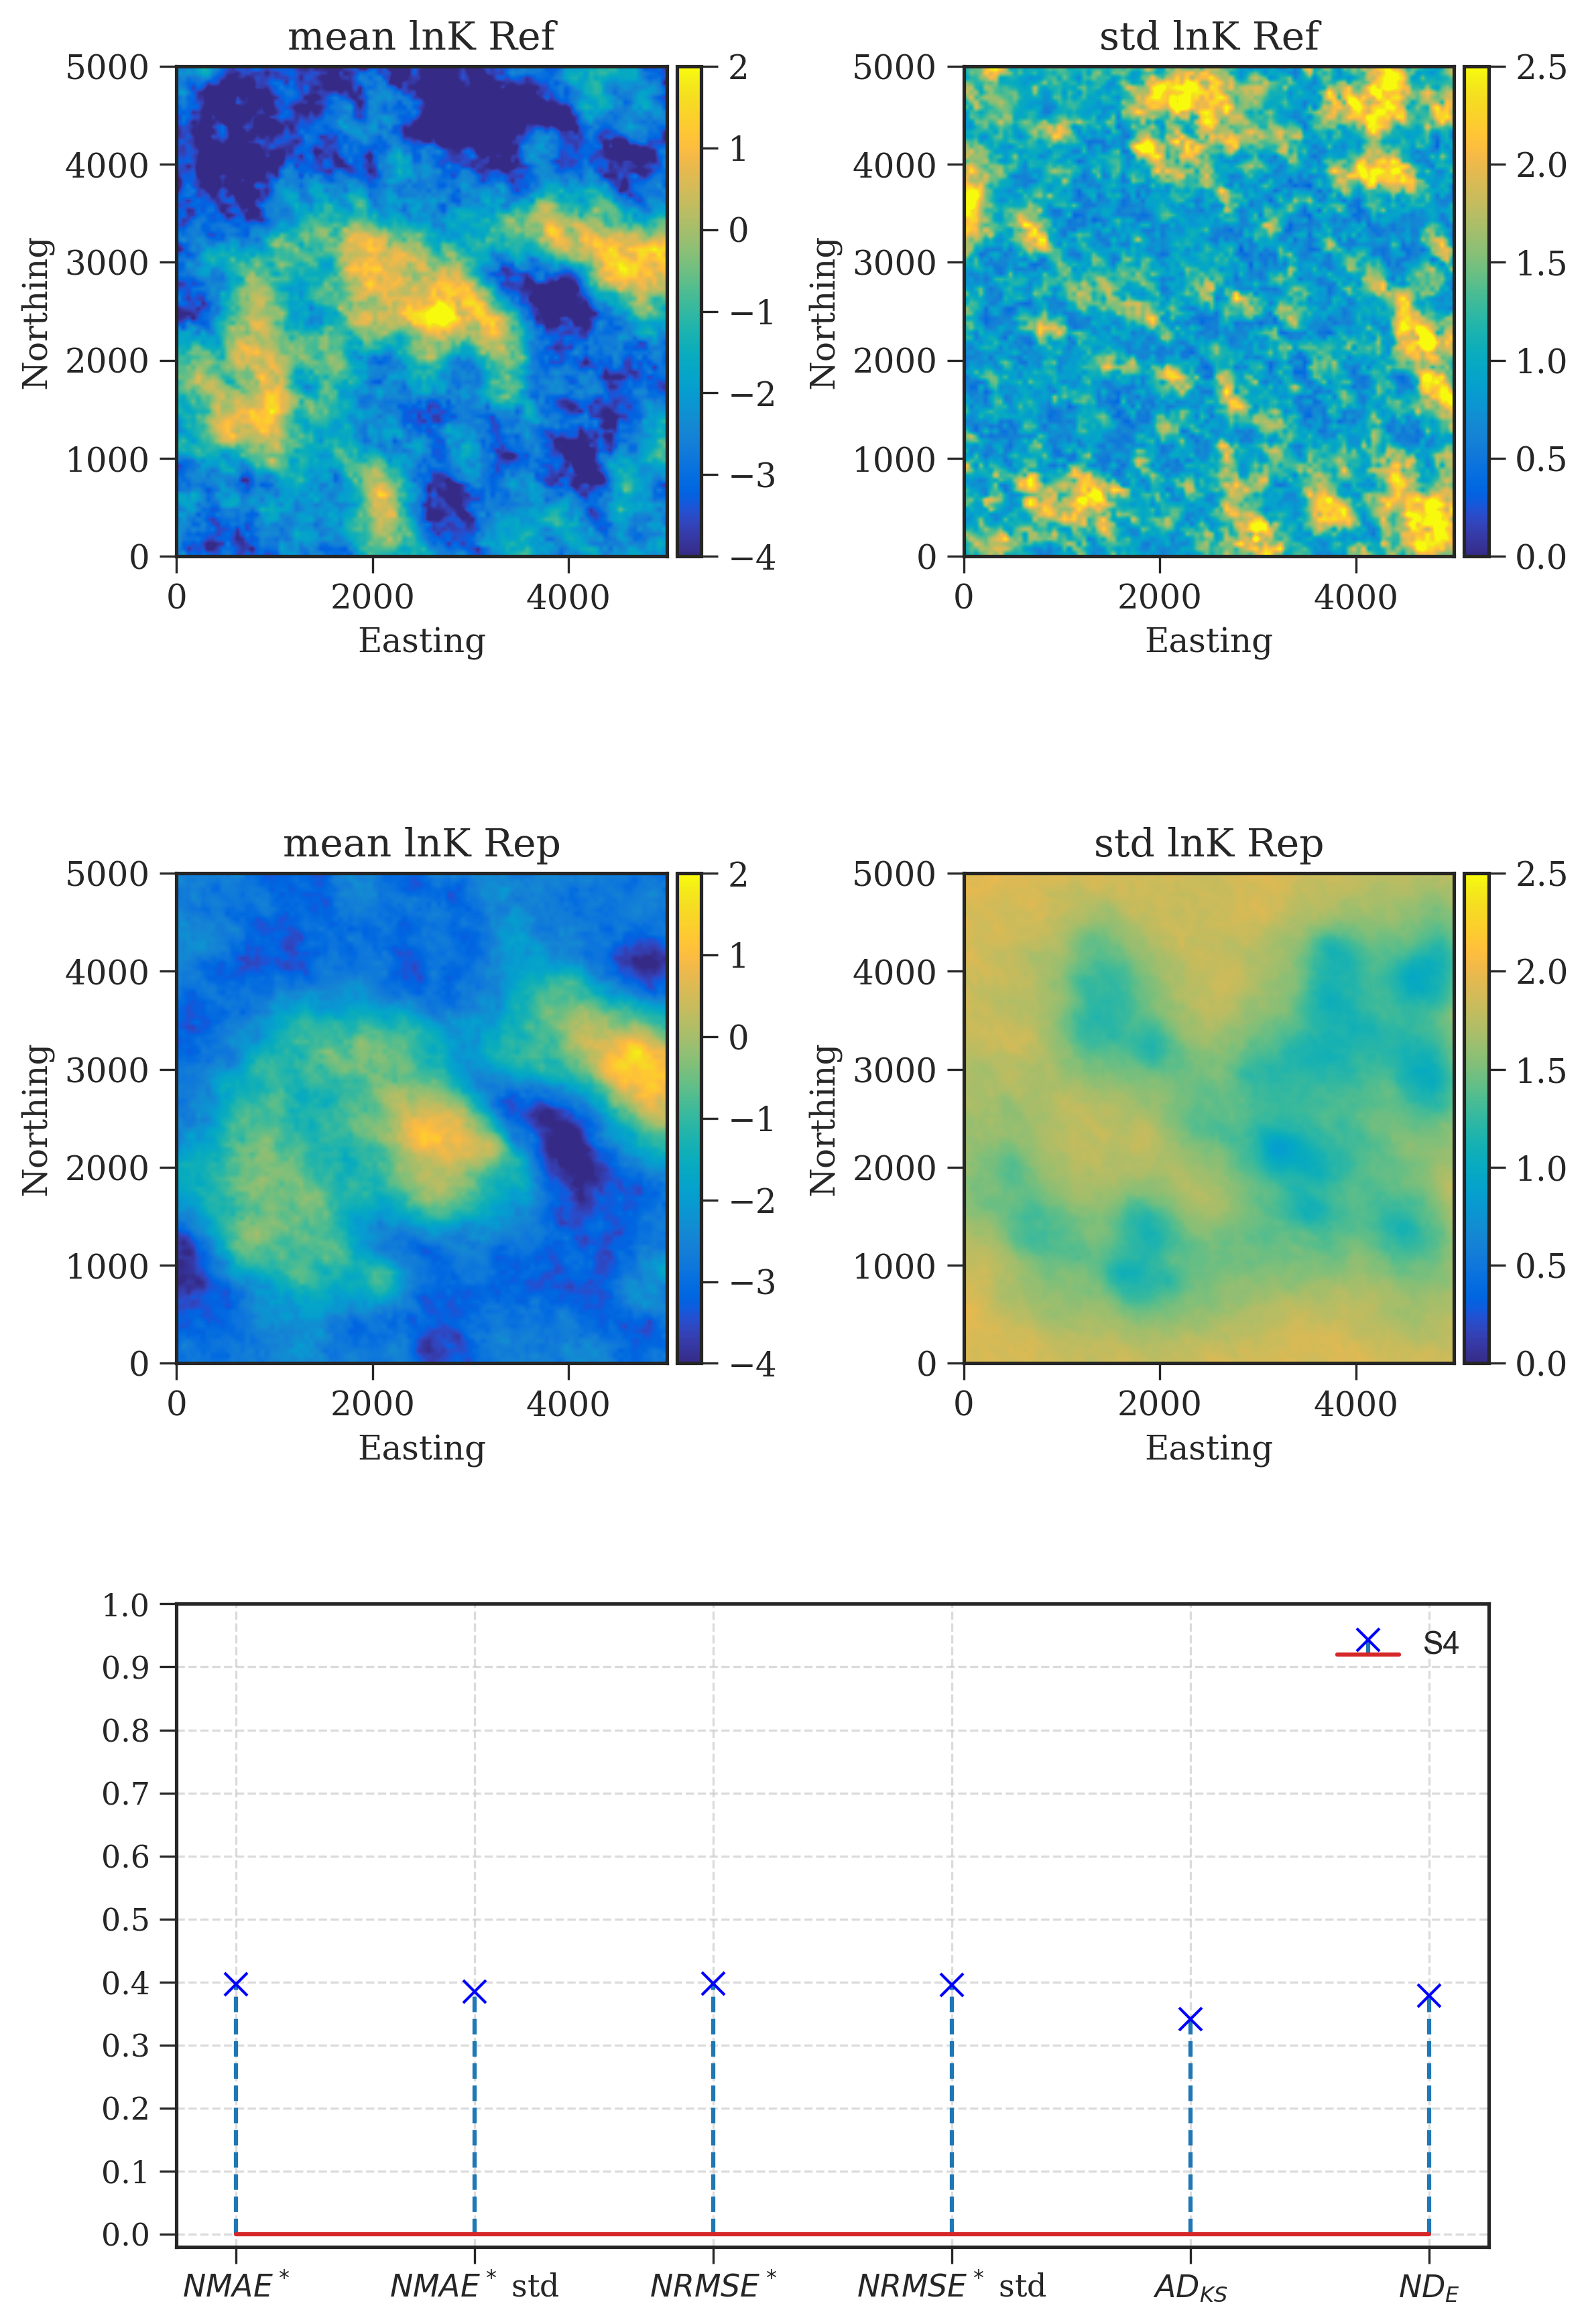

In [24]:
fig

In [14]:
print(table)

               Original  Normalized  TNormalized
$NMAE^*$       0.808008    0.659473     0.397399
$NMAE^*$ std   0.520498    0.625308     0.384732
$NRMSE^*$      1.034672    0.660390     0.397732
$NRMSE^*$ std  0.604691    0.656667     0.396378
$AD_{KS}$      0.341064    0.341064     0.341064
$ND_E$         8.073391    0.378888     0.378888
